In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [22]:
# 1️⃣ Muat data
df = pd.read_csv('Data_Alfamart Indomaret_South Jakarta.csv')
print(df.head())

                    nama_tempat  rating_tempat  user_ratings_total  latitude  \
0                     indomaret            4.3                 104 -6.302203   
1                     indomaret            0.0                   0 -6.307003   
2            indomaret bdn raya            4.2                  66 -6.279392   
3                     indomaret            4.7                   3 -6.278223   
4  indomaret karang tengah raya            4.3                 108 -6.301344   

    longitude                                      alamat_tempat  \
0  106.791936  jl. lb. bulus iii no.40, rt.9/rw.7, cilandak b...   
1  106.793690    10, rt.4/rw.10, pondok labu, south jakarta city   
2  106.798442  jl. bdn raya no.10, rt.10/rw.11, cilandak bar....   
3  106.797096  jl. rs. fatmawati raya no.7, rt.8/rw.6, gandar...   
4  106.780550  bona indah plaza, jl. karang tengah raya no.1,...   

                      place_id      store                   place_id.1  \
0  ChIJaxj8TyDuaS4RmJ8rDkpB2GA  Indo

In [23]:
# Menampilkan jumlah masing-masing store
store_counts = df['store'].value_counts()
print(store_counts)

# Menampilkan total keseluruhan
total = store_counts.sum()
print(f"Total seluruh store: {total}")

store
Indomaret    372
Alfamart     303
Name: count, dtype: int64
Total seluruh store: 675


In [24]:
print(df.shape)

(675, 12)


In [25]:
# Siapkan data koordinat (latitude, longitude)
coords = df[['latitude', 'longitude']].to_numpy()
coords_rad = np.radians(coords)  # untuk jarak haversine

In [26]:
# Terapkan DBSCAN dengan metric haversine (eps dalam satuan km dibagi dengan radius bumi)
kms_per_radian = 6371.0088
eps_km = 1.5  # misalnya 1.5 km radius cluster
db = DBSCAN(eps=eps_km / kms_per_radian, min_samples=5, metric='haversine')
df['cluster'] = db.fit_predict(coords_rad)

In [27]:
# Ringkasan hasil clustering
print(df.groupby(['store', 'cluster']).size().unstack(fill_value=0))
print("Jumlah outlier:", (df['cluster'] == -1).sum())

cluster      0
store         
Alfamart   303
Indomaret  372
Jumlah outlier: 0


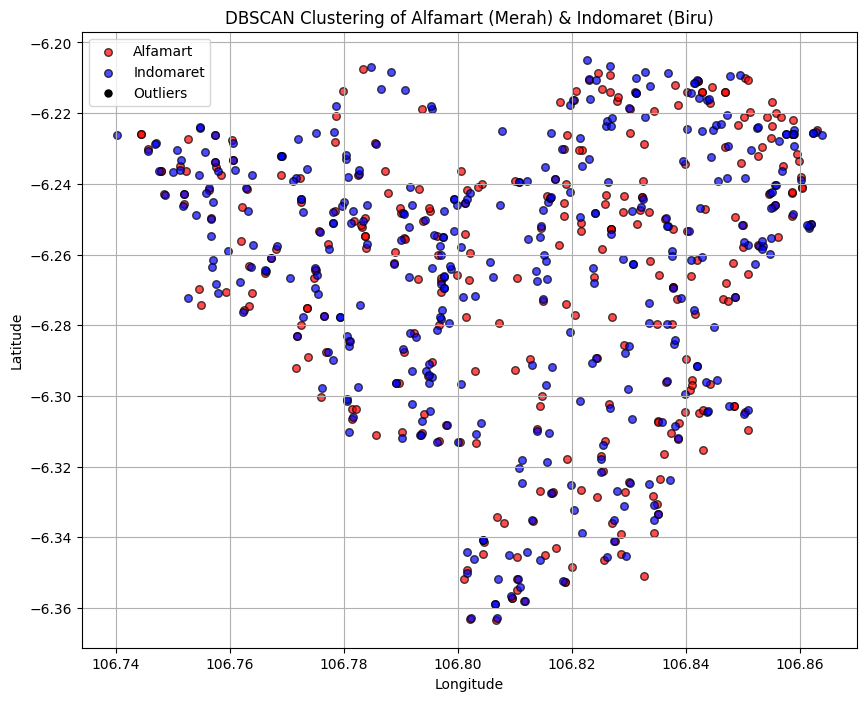

In [28]:
# Visualisasi hasil clustering dengan warna khusus
plt.figure(figsize=(10, 8))

color_mapping = {
    'Alfamart': 'red',
    'Indomaret': 'blue'
}

for store_name, color in color_mapping.items():
    subset = df[df['store'] == store_name]
    plt.scatter(subset['longitude'], subset['latitude'], 
                c=color, label=store_name, s=30, alpha=0.7, edgecolors='black')

# Tandai outlier (jika ada)
outliers = df[df['cluster'] == -1]
plt.scatter(outliers['longitude'], outliers['latitude'], 
            color='black', label='Outliers', s=50, edgecolors='white')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Alfamart (Merah) & Indomaret (Biru)')
plt.legend()
plt.grid(True)
plt.show()
